# create a 3d plot with rotating axis

# import the libraries

In [1]:
!pip install matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Rotate the plot automatically when it's generated
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def rotate_plot(ax):
    ax.view_init(elev=10., azim=-25.)   # adjust elevation and azimuth angles as needed

In [4]:
path = [(0, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1), (0, 0, 2),
        (0, 0, 3), (0, 0, 4), (1, 0, 4), (0, 1, 4), (0, 0, 5),
        (0, 0, 6), (1, 0, 6), (0, 1, 6)]

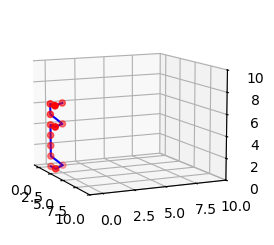

In [5]:
# Create a figure and axis
fig = plt.figure()

### add second plot

ax2 = fig.add_subplot(121, projection='3d')

# Plot the path as red dots
x, y, z = zip(*path)
ax2.scatter(x, y, z, c='r', marker='o')

# Add a line graph to show the path taken
line_path_x, line_path_y, line_path_z = [], [], []
for i in range(len(path) - 1):
    x0, y0, z0 = path[i]
    x1, y1, z1 = path[i + 1]
    line_path_x.extend([x0, x1])
    line_path_y.extend([y0, y1])
    line_path_z.extend([z0, z1])

ax2.plot3D(line_path_x, line_path_y, line_path_z, c='b')

# Set the limits of the plot to match the coordinates
ax2.set_xlim(-1, 10)
ax2.set_ylim(-1, 10)
ax2.set_zlim(0, 10)

rotate_plot(ax2)   # call this function to apply rotation

# Show the plot
plt.show()

# How fun... lets see what this looks like as a maze puzzle, with an algorithm to solve its path using BFS

## First lets create a maze the hardway.

In [6]:
maze = [[[0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0]],

        [[1, 1, 1, 1, 1, 1, 1, 1],    # layer 2 (with obstacles)
         [1, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 1, 1, 1, 1, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 1, 1, 1, 1, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 1],
         [1, 1, 1, 1, 1, 1, 1, 1],

        [[0, 0, 0, 0, 0, 0, 0, 0],    # layer 3
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],

        [[1, 1, 1, 1, 1, 1, 1, 1],    # layer 4 (with obstacles)
         [1, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 1, 1, 1, 1, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 1, 1, 1, 1, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 1],
         [1, 1, 1, 1, 1, 1, 1, 1],

        [[0, 0, 0, 0, 0, 0, 0, 0],    # layer 5
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],

        [[1, 1, 1, 1, 1, 1, 1, 1],    # layer 6 (with obstacles)
         [1, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 1, 1, 1, 1, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 1, 1, 1, 1, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 1],
         [1, 1, 1, 1, 1, 1, 1, 1],

        [[0, 0, 0, 0, 0, 0, 0, 0],    # layer 7
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 1, 1, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],

        [[1, 1, 1, 1, 1, 1, 1, 1],    # layer 8 (with obstacles)
         [1, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 1, 1, 1, 1, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 1, 1, 1, 1, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 1],
         [1, 1, 1, 1, 1, 1, 1, 1]]
        ]]]]]]]

# extremely slow and inefficient... let's code this instead.

# Create an 8x8x8 maze then use bread-first-search to find a solution through maze


In [13]:
# if no solution ~ run again

#We can hand code it like above or we can use some automation
from collections import deque
import random

# Define the maze dimensions
MAZE_SIZE = 8

# Initialize the maze as a 3D array of zeros
maze = [[[0 for _ in range(MAZE_SIZE)] for _ in range(MAZE_SIZE)] for _ in range(MAZE_SIZE)]

# build obstacles
for z in range (8):
    for i in range(8):
        for j in range(8):
            if random.random() < 0.5:  # 50% chance of being an obstacle
                maze[z][i][j] = 1

# Set the start and end points (you can adjust these to your liking)
start_point = (0, 0, 0)  # top-left corner
end_point = (MAZE_SIZE - 1, MAZE_SIZE - 1, MAZE_SIZE - 1)  # bottom-right corner

# Define the possible movements in a 3D space (up, down, left, right, forward, backward)
movements = [(0, 0, 1), (0, 0, -1), (0, 1, 0), (0, -1, 0), (1, 0, 0), (-1, 0, 0)]

# Define the BFS function
def bfs(maze):
    queue = deque([(start_point, [start_point])])
    visited = set()

    while queue:
        point, path = queue.popleft()
        if point == end_point:
            return path

        for movement in movements:
            new_point = (point[0] + movement[0], point[1] + movement[1], point[2] + movement[2])
            if 0 <= new_point[0] < MAZE_SIZE and 0 <= new_point[1] < MAZE_SIZE and 0 <= new_point[2] < MAZE_SIZE:
                if maze[new_point[0]][new_point[1]][new_point[2]] == 0:  # check if the cell is not blocked
                    if new_point not in visited:
                        queue.append((new_point, path + [new_point]))
                        visited.add(new_point)

    return None

# Run the BFS algorithm and print the solution (if found)
solution = bfs(maze)
print("Solution:", solution) if solution else print("No solution found")



Solution: [(0, 0, 0), (0, 1, 0), (1, 1, 0), (2, 1, 0), (3, 1, 0), (4, 1, 0), (5, 1, 0), (5, 2, 0), (5, 3, 0), (5, 3, 1), (6, 3, 1), (6, 3, 2), (7, 3, 2), (7, 3, 3), (7, 3, 4), (7, 3, 5), (7, 3, 6), (7, 4, 6), (7, 5, 6), (7, 5, 7), (7, 6, 7), (7, 7, 7)]


In [49]:
maze


[[[1, 1, 1, 0, 1, 0, 0, 1],
  [0, 0, 0, 1, 0, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 0],
  [0, 0, 1, 1, 0, 0, 1, 1],
  [0, 1, 1, 1, 1, 1, 1, 0],
  [0, 1, 0, 0, 1, 0, 0, 1],
  [0, 0, 0, 0, 1, 0, 0, 0],
  [1, 1, 0, 0, 1, 1, 1, 0]],
 [[1, 0, 0, 0, 1, 0, 0, 0],
  [0, 1, 1, 1, 0, 0, 1, 1],
  [1, 0, 1, 0, 0, 1, 0, 1],
  [1, 1, 1, 1, 0, 1, 0, 1],
  [0, 1, 0, 0, 0, 1, 1, 1],
  [1, 1, 1, 1, 0, 1, 1, 0],
  [0, 0, 1, 0, 0, 0, 0, 1],
  [1, 1, 1, 0, 1, 0, 0, 1]],
 [[1, 1, 0, 1, 0, 0, 1, 1],
  [0, 1, 1, 1, 1, 1, 0, 1],
  [1, 1, 1, 0, 1, 1, 1, 1],
  [1, 1, 1, 1, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 1, 1, 0],
  [1, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 1, 1, 1, 1, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 1]],
 [[1, 0, 1, 0, 0, 1, 1, 1],
  [0, 0, 1, 0, 0, 1, 1, 0],
  [1, 1, 0, 0, 0, 0, 0, 1],
  [1, 1, 0, 0, 0, 1, 0, 1],
  [0, 1, 0, 0, 0, 0, 1, 1],
  [0, 1, 0, 1, 0, 0, 0, 0],
  [0, 0, 1, 1, 0, 0, 1, 0],
  [1, 1, 1, 0, 0, 0, 0, 0]],
 [[1, 1, 1, 1, 0, 1, 1, 0],
  [0, 0, 0, 1, 1, 0, 0, 0],
  [1, 1, 1, 1, 1, 1, 1, 0],
  [1, 0, 1, 1, 0

# using the solution, lets plug it into our 3d map

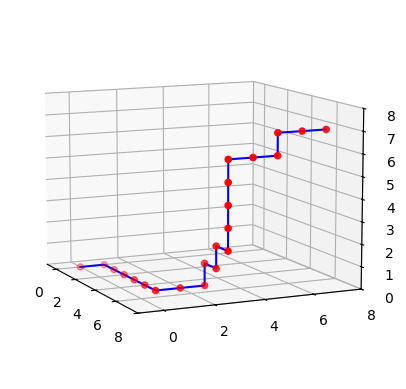

In [61]:
# Create a figure and axis
fig = plt.figure()

### add second plot

ax3 = fig.add_subplot(111, projection='3d')

# Plot the path as red dots
x, y, z = zip(*solution)
ax3.scatter(x, y, z, c='r', marker='o')

# Add a line graph to show the path taken
line_path_x, line_path_y, line_path_z = [], [], []
for i in range(len(solution) - 1):
    x0, y0, z0 = solution[i]
    x1, y1, z1 = solution[i + 1]
    line_path_x.extend([x0, x1])
    line_path_y.extend([y0, y1])
    line_path_z.extend([z0, z1])

ax3.plot3D(line_path_x, line_path_y, line_path_z, c='b')

# Set the limits of the plot to match the coordinates
ax3.set_xlim(-1, 8)
ax3.set_ylim(-1, 8)
ax3.set_zlim(0, 8),

rotate_plot(ax3)   # call this function to apply rotation

# Show the plot
plt.show()

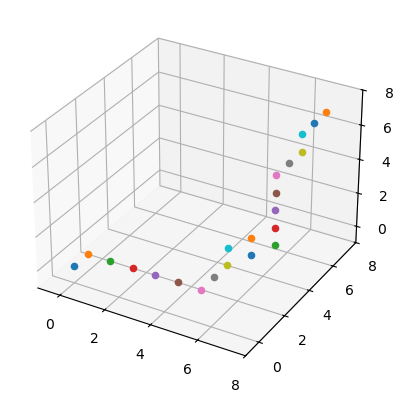

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the 8x8x8 coordinates (assuming you have a list of points)
points = solution

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for point in points:
    x, y, z = point
    ax.scatter(x, y, z)

# Set the axis limits to ensure all points are visible
ax.set_xlim(-1, 8)
ax.set_ylim(-1, 8)
ax.set_zlim(-1, 8)


plt.show()

## Lets make it Interactive!!!

In [ ]:
type(solution)

In [57]:
import pandas as pd
points = pd.DataFrame(solution, columns=['x', 'y', 'z'])

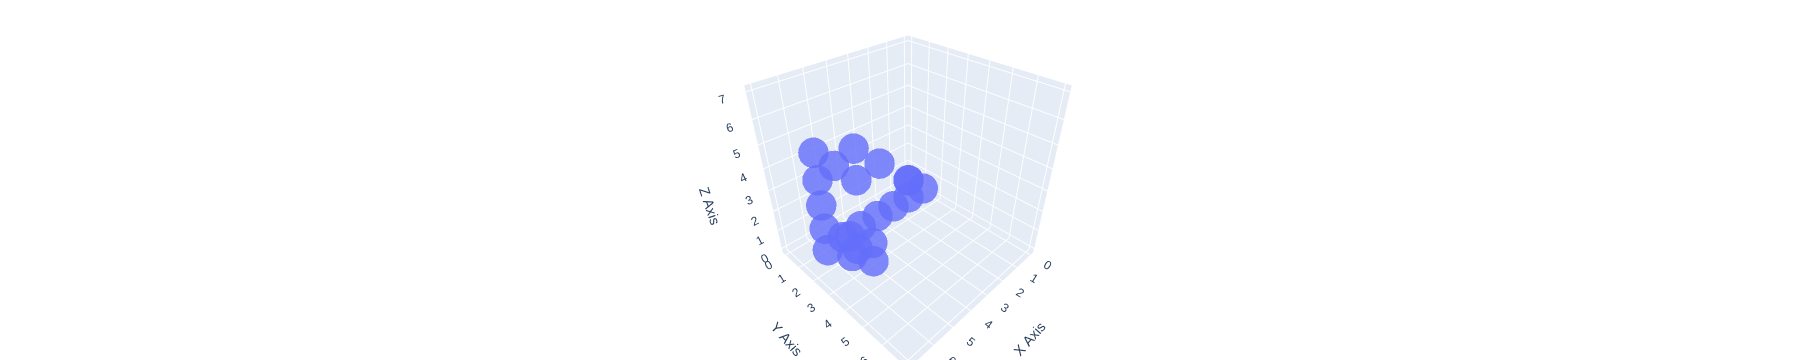

In [63]:
import pandas as pd
import plotly.graph_objects as go

# Create the scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=points['x'],
    y=points['y'],
    z=points['z'],
    mode='markers',
    marker=dict(
        size=10,
        # symbol="square", 
        opacity=0.8
    )
)])

# Update layout for better visualization
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    )
)

fig.show()